2024-05-05 23:00:48.074 | INFO     | gplugins.tidy3d:<module>:61 - Tidy3d '2.4.3' installed at ['c:\\Users\\oaper\\anaconda3\\Lib\\site-packages\\tidy3d']
2024-05-05 23:00:48.224 | INFO     | gdsfactory.technology.layer_views:__init__:790 - Importing LayerViews from YAML file: 'c:\\Users\\oaper\\anaconda3\\Lib\\site-packages\\gdsfactory\\generic_tech\\layer_views.yaml'.
2024-05-05 23:00:48.226 | INFO     | gdsfactory.pdk:activate:307 - 'generic' PDK is now active


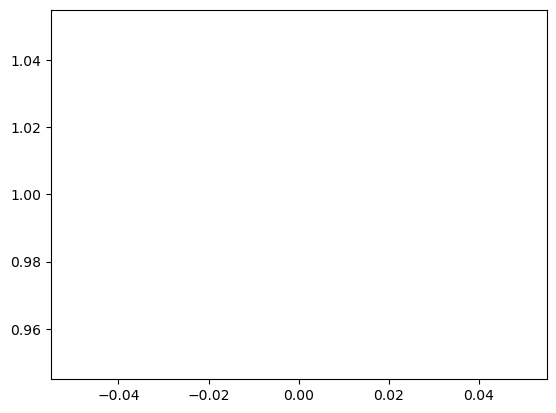

In [1]:
import matplotlib.pyplot as plt
plt.plot([1])

import numpy as np
import gymnasium as gym
from gymnasium import spaces

import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import sax

import logging
import sys
from functools import partial
from pprint import pprint

import gdsfactory as gf
import jax
import jax.example_libraries.optimizers as opt
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
import sax
from gdsfactory.generic_tech import get_generic_pdk
from numpy.fft import fft2, fftfreq, fftshift, ifft2
from rich.logging import RichHandler
from scipy import constants
from sklearn.linear_model import LinearRegression
from tqdm.notebook import trange

import gplugins.sax as gs
import gplugins.tidy3d as gt
from gplugins.common.config import PATH



gf.config.rich_output()
PDK = get_generic_pdk()
PDK.activate()

logger = logging.getLogger()
logger.removeHandler(sys.stderr)
logging.basicConfig(level="WARNING", datefmt="[%X]", handlers=[RichHandler()])

gf.config.set_plot_options(show_subports=False)

from math import e

In [2]:
parameter_array = [10, 2, 2]


def straight(wl=1.5, length=10.0, neff=2.4) -> sax.SDict:
    return sax.reciprocal({("o1", "o2"): jnp.exp(2j * jnp.pi * neff * length / wl)})

def mmi1x2():
    """Assumes a perfect 1x2 splitter"""
    return sax.reciprocal(
        {
            ("o1", "o2"): 0.5**0.5,
            ("o1", "o3"): 0.5**0.5,
        }
    )

def bend_euler(wl=1.5, length=20.0):
    """ "Let's assume a reduced transmission for the euler bend compared to a straight"""
    return {k: 0.99 * v for k, v in straight(wl=wl, length=length).items()}

def bend_euler_2(wl=1.5, length=20.0):
    """ "Let's assume a reduced transmission for the euler bend compared to a straight"""
    return {k: 0.98 * v for k, v in straight(wl=wl, length=length).items()}

def waveguide(wl=1.55, wl0=1.55, neff=2.34, ng=3.4, length=10.0, loss=0.0) -> sax.SDict:
    dwl = wl - wl0
    dneff_dwl = (ng - neff) / wl0
    neff = neff - dwl * dneff_dwl
    phase = 2 * jnp.pi * neff * length / wl
    transmission = 10 ** (-loss * length / 20) * jnp.exp(1j * phase)
    return sax.reciprocal(
        {
            ("o1", "o2"): transmission,
        }
    )

models = {
    "bend_euler": bend_euler,
    "mmi1x2": mmi1x2,
    "straight": straight,

}

models_2 = {
    "bend_euler": bend_euler,
    "mmi1x2": mmi1x2,
    "straight": waveguide,
}

mzi_component = gf.components.mzi(
    delta_length=parameter_array[0], length_x=parameter_array[2], length_y=parameter_array[1],
)
        
mzi_circuit, _ = sax.circuit(
    netlist=mzi_component.get_netlist(),
    models=models,
)

mzi_circuit_2, _ = sax.circuit(
    netlist=mzi_component.get_netlist(),
    models=models_2,
)
S = mzi_circuit(
    wl=1.53,
    syl={
        "length": parameter_array[0] / 2 + 2,
    },
    straight_9={
        "length": parameter_array[0] / 2 + 2,
    },
)


  0%|          | 0/300 [00:00<?, ?it/s]

30.22716684746296


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

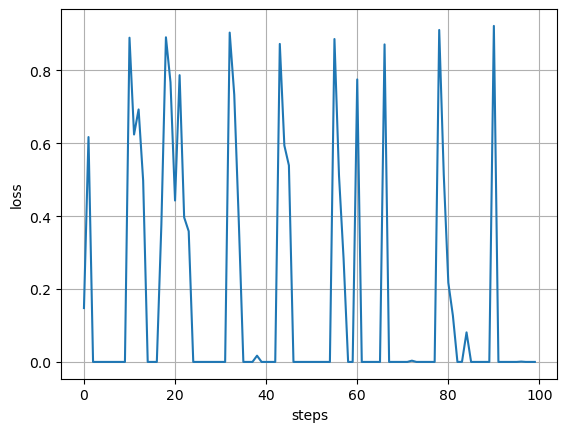

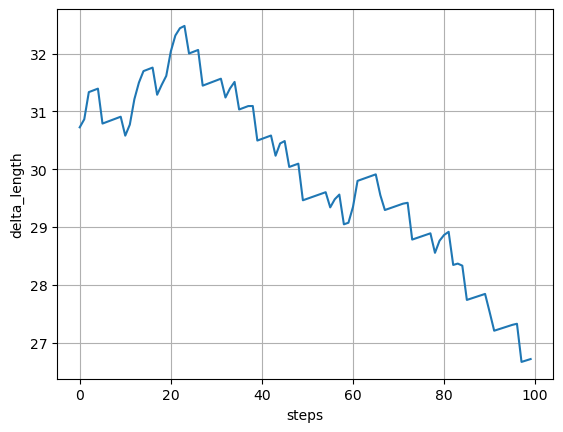

In [3]:

@jax.jit
def loss_fn(delta_length, opt_wl):
    wl_ = opt_wl
    S = mzi_circuit_2(
        wl=wl_,
        syl={
            "length": delta_length / 2 + 2,
        },
        straight_9={
            "length": delta_length / 2 + 2,
        },
    )
    return (abs(S["o1", "o2"]) ** 2).mean()

grad_fn = jax.jit(
    jax.grad(
        loss_fn,
        argnums=0,  # JAX gradient function for the first positional argument, jitted
    )
)

initial_delta_length = 30.0
init_fn, update_fn, params_fn = opt.adam(step_size=0.1)
state = init_fn(initial_delta_length)

def step_fn(step, state, opt_wl):
    settings = params_fn(state)
    # print(settings)
    loss = loss_fn(settings, opt_wl)
    grad = grad_fn(settings, opt_wl)
    state = update_fn(step, grad, state)
    return loss, state

range_ = trange(300)
for step in range_:
    loss, state = step_fn(step, state, 1.53)
    range_.set_postfix(loss=f"{loss:.6f}")

delta_length = params_fn(state)
print(delta_length)

peak_wavelength_array = np.linspace(1.5, 1.6, 100)
final_loss_array = []
delta_length_array = []

for opt_wl in peak_wavelength_array:
    range_ = trange(300)
    for step in range_:
        loss, state = step_fn(step, state, opt_wl)
        range_.set_postfix(loss=f"{loss:.6f}")
    final_loss_array = final_loss_array + [loss]
    delta_length_array = delta_length_array + [params_fn(state)]

plt.figure()
plt.plot(final_loss_array)
plt.xlabel("steps")
plt.ylabel("loss")
plt.grid()

plt.figure()
plt.plot(delta_length_array)
plt.xlabel("steps")
plt.ylabel("delta_length")
plt.grid()

In [ ]:

@jax.jit
def loss_fn(delta_length, opt_wl):
    wl_ = opt_wl
    S = mzi_circuit_2(
        wl=wl_,
        syl={
            "length": delta_length / 2 + 2,
        },
        straight_9={
            "length": delta_length / 2 + 2,
        },
    )
    return (abs(S["o1", "o2"]) ** 2).mean()

grad_fn = jax.jit(
    jax.grad(
        loss_fn,
        argnums=0,  # JAX gradient function for the first positional argument, jitted
    )
)

initial_delta_length = 30.0
init_fn, update_fn, params_fn = opt.adam(step_size=0.05)
state = init_fn(initial_delta_length)

def step_fn(step, state, opt_wl):
    settings = params_fn(state)
    # print(settings)
    loss = loss_fn(settings, opt_wl)
    grad = grad_fn(settings, opt_wl)
    state = update_fn(step, grad, state)
    return loss, state

range_ = trange(300)
for step in range_:
    loss, state = step_fn(step, state, 1.53)
    range_.set_postfix(loss=f"{loss:.6f}")

delta_length = params_fn(state)
print(delta_length)

peak_wavelength_array = np.linspace(1.5, 1.6, 100)
final_loss_array = []
delta_length_array = []

for opt_wl in peak_wavelength_array:
    range_ = trange(300)
    for step in range_:
        loss, state = step_fn(step, state, opt_wl)
        range_.set_postfix(loss=f"{loss:.6f}")
    final_loss_array = final_loss_array + [loss]
    delta_length_array = delta_length_array + [params_fn(state)]

plt.figure()
plt.plot(final_loss_array)
plt.xlabel("steps")
plt.ylabel("loss")
plt.grid()

plt.figure()
plt.plot(delta_length_array)
plt.xlabel("steps")
plt.ylabel("delta_length")
plt.grid()

  0%|          | 0/300 [00:00<?, ?it/s]

30.230079897578506


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

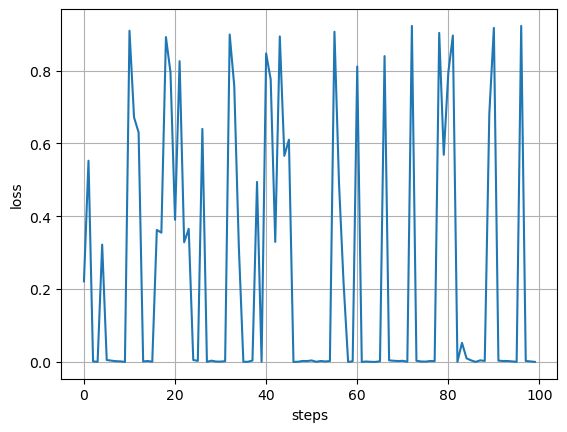

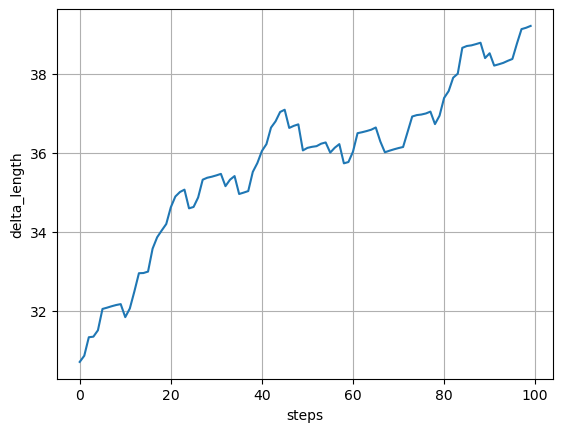

In [4]:

@jax.jit
def loss_fn(delta_length, opt_wl):
    wl_ = opt_wl
    S = mzi_circuit_2(
        wl=wl_,
        syl={
            "length": delta_length / 2 + 2,
        },
        straight_9={
            "length": delta_length / 2 + 2,
        },
    )
    return (abs(S["o1", "o2"]) ** 2).mean()

grad_fn = jax.jit(
    jax.grad(
        loss_fn,
        argnums=0,  # JAX gradient function for the first positional argument, jitted
    )
)

initial_delta_length = 30.0
init_fn, update_fn, params_fn = opt.adam(step_size=0.1, b1=0.7, b2=0.7)
state = init_fn(initial_delta_length)

def step_fn(step, state, opt_wl):
    settings = params_fn(state)
    # print(settings)
    loss = loss_fn(settings, opt_wl)
    grad = grad_fn(settings, opt_wl)
    state = update_fn(step, grad, state)
    return loss, state

range_ = trange(300)
for step in range_:
    loss, state = step_fn(step, state, 1.53)
    range_.set_postfix(loss=f"{loss:.6f}")

delta_length = params_fn(state)
print(delta_length)

peak_wavelength_array = np.linspace(1.5, 1.6, 100)
final_loss_array = []
delta_length_array = []

for opt_wl in peak_wavelength_array:
    range_ = trange(300)
    for step in range_:
        loss, state = step_fn(step, state, opt_wl)
        range_.set_postfix(loss=f"{loss:.6f}")
    final_loss_array = final_loss_array + [loss]
    delta_length_array = delta_length_array + [params_fn(state)]

plt.figure()
plt.plot(final_loss_array)
plt.xlabel("steps")
plt.ylabel("loss")
plt.grid()

plt.figure()
plt.plot(delta_length_array)
plt.xlabel("steps")
plt.ylabel("delta_length")
plt.grid()

  0%|          | 0/1000 [00:00<?, ?it/s]

30.229200181449144


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

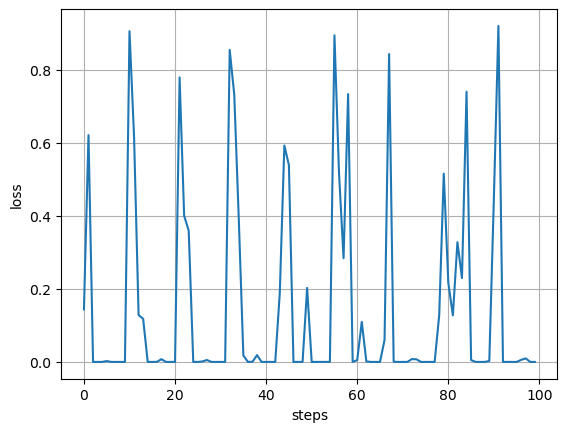

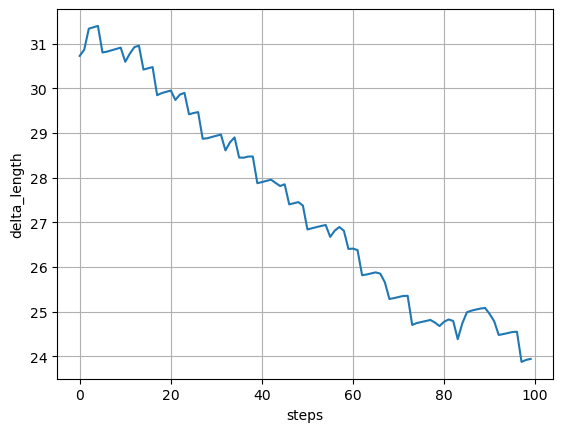

In [7]:

@jax.jit
def loss_fn(delta_length, opt_wl):
    wl_ = opt_wl
    S = mzi_circuit_2(
        wl=wl_,
        syl={
            "length": delta_length / 2 + 2,
        },
        straight_9={
            "length": delta_length / 2 + 2,
        },
    )
    return (abs(S["o1", "o2"]) ** 2).mean()

grad_fn = jax.jit(
    jax.grad(
        loss_fn,
        argnums=0,  # JAX gradient function for the first positional argument, jitted
    )
)

initial_delta_length = 30.0
# init_fn, update_fn, params_fn = opt.adam(step_size=0.1, b1=0.7, b2=0.7)
init_fn, update_fn, params_fn = opt.adagrad(step_size=0.1, momentum=0.99)
state = init_fn(initial_delta_length)

def step_fn(step, state, opt_wl):
    settings = params_fn(state)
    # print(settings)
    loss = loss_fn(settings, opt_wl)
    grad = grad_fn(settings, opt_wl)
    state = update_fn(step, grad, state)
    return loss, state

range_ = trange(1000)
for step in range_:
    loss, state = step_fn(step, state, 1.53)
    range_.set_postfix(loss=f"{loss:.6f}")

delta_length = params_fn(state)
print(delta_length)

peak_wavelength_array = np.linspace(1.5, 1.6, 100)
final_loss_array = []
delta_length_array = []

for opt_wl in peak_wavelength_array:
    range_ = trange(1000)
    for step in range_:
        loss, state = step_fn(step, state, opt_wl)
        range_.set_postfix(loss=f"{loss:.6f}")
    final_loss_array = final_loss_array + [loss]
    delta_length_array = delta_length_array + [params_fn(state)]

plt.figure()
plt.plot(final_loss_array)
plt.xlabel("steps")
plt.ylabel("loss")
plt.grid()

plt.figure()
plt.plot(delta_length_array)
plt.xlabel("steps")
plt.ylabel("delta_length")
plt.grid()


In [9]:
# Import modules
import numpy as np

# Import PySwarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx

from pyswarms.single.global_best import GlobalBestPSO

global opt_wl

a = 1.5
opt_wl= a
@jax.jit
def loss_fn(delta_length):
    wl_ = opt_wl
    S = mzi_circuit_2(
        wl=wl_,
        syl={
            "length": delta_length / 2 + 2,
        },
        straight_9={
            "length": delta_length / 2 + 2,
        },
    )
    return (abs(S["o1", "o2"]) ** 2).mean()



%time
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.9, 'w':0.7}

# Call instance of PSO
bounds=([29], [31])

optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=1, options=options, bounds=bounds)

# Perform optimization
cost, pos = optimizer.optimize(loss_fn, iters=1000)



2024-05-06 00:07:10,862 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}


CPU times: total: 0 ns
Wall time: 0 ns


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.021
2024-05-06 00:07:14,944 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0210297678375162, best pos: [30.60778172]


2024-05-06 00:07:25,641 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.021
2024-05-06 00:07:29,718 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0210297678375162, best pos: [30.60778172]
2024-05-06 00:07:29,724 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.021
2024-05-06 00:07:33,717 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0210297678375162, best pos: [30.60778172]
2024-05-06 00:07:33,724 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.021
2024-05-06 00:07:37,788 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0210297678375162, best pos: [30.60778172]
2024-05-06 00:07:37,794 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.021
2024-05-06 00:07:42,162 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0210297678375162, best pos: [30.60778172]
2024-05-06 00:07:42,171 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.021
2024-05-06 00:07:46,154 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0210297678375162, best pos: [30.60778172]
2024-05-06 00:07:46,163 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.021
2024-05-06 00:07:50,202 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0210297678375162, best pos: [30.60778172]
2024-05-06 00:07:50,208 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.021
2024-05-06 00:07:54,226 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0210297678375162, best pos: [30.60778172]
2024-05-06 00:07:54,232 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.021
2024-05-06 00:07:58,197 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0210297678375162, best pos: [30.60778172]
2024-05-06 00:07:58,203 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.021
2024-05-06 00:08:02,057 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0210297678375162, best pos: [30.60778172]
2024-05-06 00:08:02,063 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.021
2024-05-06 00:08:05,899 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0210297678375162, best pos: [30.60778172]
2024-05-06 00:08:05,905 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.021
2024-05-06 00:08:10,088 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0210297678375162, best pos: [30.60778172]
2024-05-06 00:08:10,096 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.021
2024-05-06 00:08:13,968 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0210297678375162, best pos: [30.60778172]
2024-05-06 00:08:13,975 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.021
2024-05-06 00:08:17,888 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0210297678375162, best pos: [30.60778172]
2024-05-06 00:08:17,894 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.021
2024-05-06 00:08:21,807 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0210297678375162, best pos: [30.60778172]
2024-05-06 00:08:21,814 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.021
2024-05-06 00:08:25,687 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0210297678375162, best pos: [30.60778172]
2024-05-06 00:08:25,693 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.021
2024-05-06 00:08:29,521 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0210297678375162, best pos: [30.60778172]
2024-05-06 00:08:29,527 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.021
2024-05-06 00:08:33,673 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0210297678375162, best pos: [30.60778172]
2024-05-06 00:08:33,679 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.021
2024-05-06 00:08:37,554 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0210297678375162, best pos: [30.60778172]
2024-05-06 00:08:37,561 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.021
2024-05-06 00:08:41,412 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0210297678375162, best pos: [30.60778172]
2024-05-06 00:08:41,419 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.021
2024-05-06 00:08:45,358 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0210297678375162, best pos: [30.60778172]
2024-05-06 00:08:45,364 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00478
2024-05-06 00:08:49,226 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.004782375470859238, best pos: [30.60778172]
2024-05-06 00:08:49,232 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.0041
2024-05-06 00:08:53,109 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0041038564673129205, best pos: [30.60778172]
2024-05-06 00:08:53,116 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.0041
2024-05-06 00:08:57,009 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0041038564673129205, best pos: [30.60778172]
2024-05-06 00:08:57,015 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.0041
2024-05-06 00:09:01,194 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0041038564673129205, best pos: [30.60778172]
2024-05-06 00:09:01,200 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.0041
2024-05-06 00:09:05,038 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0041038564673129205, best pos: [30.60778172]
2024-05-06 00:09:05,044 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.0041
2024-05-06 00:09:08,882 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0041038564673129205, best pos: [30.60778172]
2024-05-06 00:09:08,888 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.0041
2024-05-06 00:09:12,780 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0041038564673129205, best pos: [30.60778172]
2024-05-06 00:09:12,788 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.0041
2024-05-06 00:09:16,670 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0041038564673129205, best pos: [30.60778172]
2024-05-06 00:09:16,677 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.0041
2024-05-06 00:09:20,572 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0041038564673129205, best pos: [30.60778172]
2024-05-06 00:09:20,579 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.0041
2024-05-06 00:09:24,766 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0041038564673129205, best pos: [30.60778172]
2024-05-06 00:09:24,773 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.0041
2024-05-06 00:09:28,645 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0041038564673129205, best pos: [30.60778172]
2024-05-06 00:09:28,652 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.0041
2024-05-06 00:09:32,542 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0041038564673129205, best pos: [30.60778172]
2024-05-06 00:09:32,548 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.0041
2024-05-06 00:09:36,411 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0041038564673129205, best pos: [30.60778172]
2024-05-06 00:09:36,418 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.0041
2024-05-06 00:09:40,294 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0041038564673129205, best pos: [30.60778172]
2024-05-06 00:09:40,300 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.0041
2024-05-06 00:09:44,218 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0041038564673129205, best pos: [30.60778172]
2024-05-06 00:09:44,224 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.0041
2024-05-06 00:09:48,122 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0041038564673129205, best pos: [30.60778172]
2024-05-06 00:09:48,129 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.0041
2024-05-06 00:09:52,266 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0041038564673129205, best pos: [30.60778172]
2024-05-06 00:09:52,272 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.0041
2024-05-06 00:09:56,152 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0041038564673129205, best pos: [30.60778172]
2024-05-06 00:09:56,159 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.0041
2024-05-06 00:10:00,044 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0041038564673129205, best pos: [30.60778172]
2024-05-06 00:10:00,050 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.0041
2024-05-06 00:10:03,951 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0041038564673129205, best pos: [30.60778172]
2024-05-06 00:10:03,957 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.0041
2024-05-06 00:10:07,823 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0041038564673129205, best pos: [30.60778172]
2024-05-06 00:10:07,830 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.0041
2024-05-06 00:10:11,736 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0041038564673129205, best pos: [30.60778172]
2024-05-06 00:10:11,743 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.0041
2024-05-06 00:10:15,916 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0041038564673129205, best pos: [30.60778172]
2024-05-06 00:10:15,922 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.000386
2024-05-06 00:10:19,794 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003863858122188196, best pos: [30.60778172]
2024-05-06 00:10:19,800 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.000386
2024-05-06 00:10:23,733 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003863858122188196, best pos: [30.60778172]
2024-05-06 00:10:23,740 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.000386
2024-05-06 00:10:27,634 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003863858122188196, best pos: [30.60778172]
2024-05-06 00:10:27,641 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.000386
2024-05-06 00:10:31,527 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003863858122188196, best pos: [30.60778172]
2024-05-06 00:10:31,533 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.000386
2024-05-06 00:10:35,438 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003863858122188196, best pos: [30.60778172]
2024-05-06 00:10:35,445 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.000386
2024-05-06 00:10:39,331 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003863858122188196, best pos: [30.60778172]
2024-05-06 00:10:39,338 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.000386
2024-05-06 00:10:43,505 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003863858122188196, best pos: [30.60778172]
2024-05-06 00:10:43,511 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.000386
2024-05-06 00:10:47,420 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003863858122188196, best pos: [30.60778172]
2024-05-06 00:10:47,428 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.000386
2024-05-06 00:10:51,357 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003863858122188196, best pos: [30.60778172]
2024-05-06 00:10:51,364 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.000386
2024-05-06 00:10:55,250 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003863858122188196, best pos: [30.60778172]
2024-05-06 00:10:55,257 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.000386
2024-05-06 00:10:59,157 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003863858122188196, best pos: [30.60778172]
2024-05-06 00:10:59,164 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.000386
2024-05-06 00:11:03,079 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003863858122188196, best pos: [30.60778172]
2024-05-06 00:11:03,086 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.000386
2024-05-06 00:11:07,209 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003863858122188196, best pos: [30.60778172]
2024-05-06 00:11:07,217 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.000386
2024-05-06 00:11:11,091 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003863858122188196, best pos: [30.60778172]
2024-05-06 00:11:11,098 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.000386
2024-05-06 00:11:14,985 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003863858122188196, best pos: [30.60778172]
2024-05-06 00:11:14,992 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.000386
2024-05-06 00:11:18,916 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003863858122188196, best pos: [30.60778172]
2024-05-06 00:11:18,923 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.000386
2024-05-06 00:11:22,801 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003863858122188196, best pos: [30.60778172]
2024-05-06 00:11:22,808 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.000386
2024-05-06 00:11:26,705 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003863858122188196, best pos: [30.60778172]
2024-05-06 00:11:26,711 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.000386
2024-05-06 00:11:30,553 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003863858122188196, best pos: [30.60778172]
2024-05-06 00:11:30,560 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.000386
2024-05-06 00:11:34,689 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003863858122188196, best pos: [30.60778172]
2024-05-06 00:11:34,695 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.000386
2024-05-06 00:11:38,587 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003863858122188196, best pos: [30.60778172]
2024-05-06 00:11:38,594 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.000386
2024-05-06 00:11:42,494 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003863858122188196, best pos: [30.60778172]
2024-05-06 00:11:42,501 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.000386
2024-05-06 00:11:46,436 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003863858122188196, best pos: [30.60778172]
2024-05-06 00:11:46,443 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:11:50,306 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:11:50,313 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:11:54,197 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:11:54,204 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:11:58,390 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:11:58,396 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:12:02,295 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:12:02,318 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:12:06,200 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:12:06,207 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:12:10,131 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:12:10,137 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:12:14,006 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:12:14,012 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:12:17,890 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:12:17,897 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:12:21,820 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:12:21,827 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:12:26,004 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:12:26,010 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:12:29,932 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:12:29,938 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:12:33,842 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:12:33,848 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:12:37,746 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:12:37,753 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:12:41,647 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:12:41,654 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:12:45,594 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:12:45,600 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:12:49,791 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:12:49,797 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:12:53,712 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:12:53,718 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:12:57,608 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:12:57,615 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:13:01,517 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:13:01,524 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:13:05,493 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:13:05,500 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:13:09,394 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:13:09,401 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:13:13,324 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:13:13,330 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:13:17,527 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:13:17,534 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:13:21,444 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:13:21,451 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:13:25,356 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:13:25,363 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:13:29,324 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:13:29,330 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:13:33,299 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:13:33,307 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:13:37,235 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:13:37,242 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:13:41,476 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:13:41,482 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:13:45,414 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:13:45,420 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:13:49,324 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:13:49,331 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:13:53,276 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:13:53,283 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:13:57,245 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:13:57,252 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/1000

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=1/0)>


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:14:01,215 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]


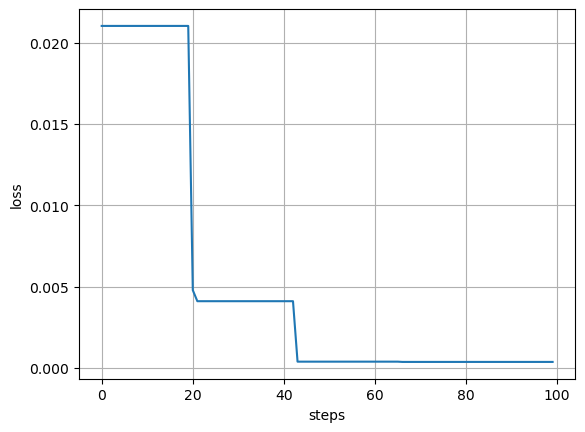

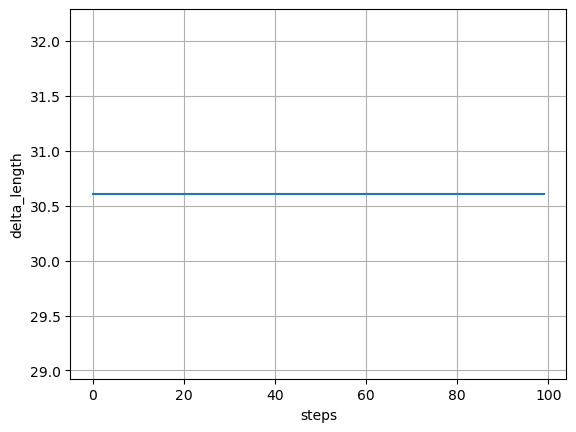

In [10]:
peak_wavelength_array = np.linspace(1.5, 1.6, 100)
final_loss_array = []
delta_length_array = []

for opt_wl_ in peak_wavelength_array:
    
    @jax.jit
    def loss_fn(delta_length, opt_wl):
        wl = opt_wl
        S = mzi_circuit_2(
            wl=wl,
            syl={
                "length": delta_length / 2 + 2,
        },
            straight_9={
                "length": delta_length / 2 + 2,
            },
        )
        print(wl)
        return (abs(S["o1", "o2"]) ** 2).mean()
    cost, pos = optimizer.optimize(lambda delta_length: loss_fn(delta_length, opt_wl_), iters=1000)
    final_loss_array = final_loss_array + [cost]
    delta_length_array = delta_length_array + [pos]

plt.figure()
plt.plot(final_loss_array)
plt.xlabel("steps")
plt.ylabel("loss")
plt.grid()

plt.figure()
plt.plot(delta_length_array)
plt.xlabel("steps")
plt.ylabel("delta_length")
plt.grid()

2024-05-06 00:43:50,369 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/100

pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.00037
2024-05-06 00:43:51,714 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:43:51,716 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.00037
2024-05-06 00:43:52,012 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:43:52,014 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.00037
2024-05-06 00:43:52,314 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]


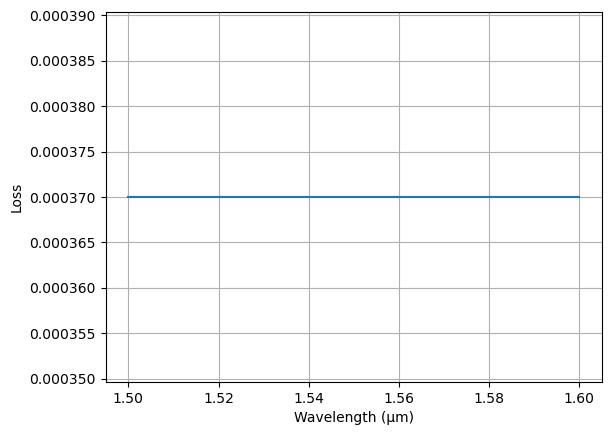

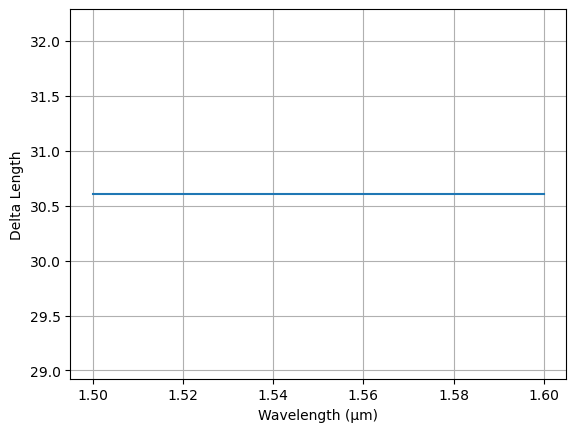

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp

# Assuming mzi_circuit_2 and optimizer are defined elsewhere
    
@jax.jit
def loss_fn(delta_length, opt_wl_=1.6):
    opt_wl__= opt_wl_
    S = mzi_circuit(
        wl=1.55,
        syl={"length": delta_length / 2 + 2},
        straight_9={"length": delta_length / 2 + 2},
    )
    return (abs(S["o1", "o2"]) ** 2).mean()

# Arrays
peak_wavelength_array = np.linspace(1.5, 1.6, 3)
final_loss_array = []
delta_length_array = []

for opt_wl_ in peak_wavelength_array:
    cost, pos = optimizer.optimize(lambda dl: loss_fn(dl, opt_wl_), iters=100)
    final_loss_array.append(cost)
    delta_length_array.append(pos)

# Plotting
plt.figure()
plt.plot(peak_wavelength_array, final_loss_array)
plt.xlabel("Wavelength (μm)")
plt.ylabel("Loss")
plt.grid()

plt.figure()
plt.plot(peak_wavelength_array, delta_length_array)
plt.xlabel("Wavelength (μm)")
plt.ylabel("Delta Length")
plt.grid()

plt.show()

2024-05-06 00:44:25,521 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:44:29,992 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:44:29,993 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:44:34,075 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192387635, best pos: [30.60778172]
2024-05-06 00:44:34,076 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.9, 'w': 0.7}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00037
2024-05-06 00:44:38,177 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003700054192

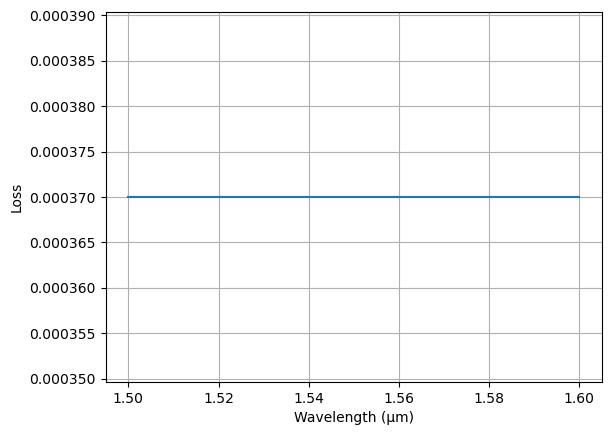

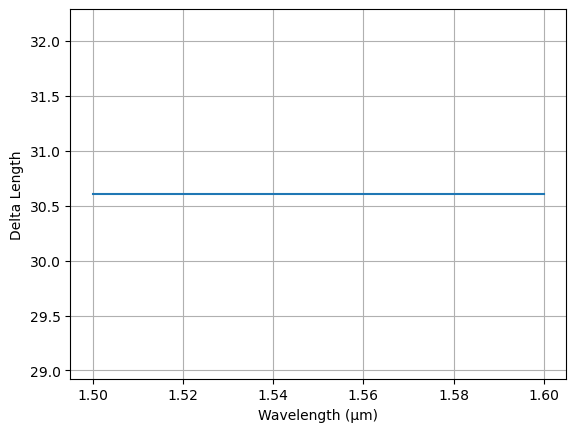

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp

# Assuming mzi_circuit_2 and optimizer are defined elsewhere

def loss_fn(delta_length, wl):
    S = mzi_circuit_2(
        wl=wl,
        syl={"length": delta_length / 2 + 2},
        straight_9={"length": delta_length / 2 + 2},
    )
    return (abs(S["o1", "o2"]) ** 2).mean()

# Compile the loss function with explicit handling of wl as a dynamic argument
jit_loss_fn = jax.jit(loss_fn, static_argnums=(1,))

# Arrays
peak_wavelength_array = np.linspace(1.5, 1.6, 3)
final_loss_array = []
delta_length_array = []

for opt_wl in peak_wavelength_array:
    cost, pos = optimizer.optimize(lambda dl: jit_loss_fn(dl, opt_wl), iters=1000)
    final_loss_array.append(cost)
    delta_length_array.append(pos)

# Plotting
plt.figure()
plt.plot(peak_wavelength_array, final_loss_array)
plt.xlabel("Wavelength (μm)")
plt.ylabel("Loss")
plt.grid()

plt.figure()
plt.plot(peak_wavelength_array, delta_length_array)
plt.xlabel("Wavelength (μm)")
plt.ylabel("Delta Length")
plt.grid()

plt.show()
